In [1]:
import fit_plots_voigt as plots
import numpy

voigt


In [2]:
inds_to_plot = numpy.load('inds_to_plot.npy')
run_name = 'objects_to_fit'

n_objects = inds_to_plot.shape[0]
nOIII_A = numpy.zeros([n_objects,3])
nHb_A = numpy.zeros([n_objects,3])
bHb_A = numpy.zeros([n_objects,3])
bHb_fwhm = numpy.zeros([n_objects,3])
vHb_fwhm = numpy.zeros([n_objects,3])
nHb_fwhm = numpy.zeros([n_objects,3])

In [3]:
for idx, i in enumerate(inds_to_plot):
    model_file_name = model_file_name = 'fit_results/full_model_{}_idx_{}.npy'.format(run_name,i)
    [ Power_law, Hbeta_broad, Hbeta_narrow, OIII_1_broad, OIII_1_narrow, OIII_2_broad, OIII_2_narrow, Hbeta_asym, OIII_asym] = numpy.load(model_file_name)
    fwhm_g = 2 * Hbeta_broad.aD
    fwhm_l = 2 * Hbeta_broad.aL
    nHb_A[idx] = Hbeta_narrow.A
    bHb_A[idx] = Hbeta_broad.ampl
    nOIII_A[idx] = OIII_2_narrow.A

    nHb_fwhm[idx] = Hbeta_narrow.fwhm
    bHb_fwhm[idx] =  0.5346 * fwhm_l + numpy.sqrt(0.2166 * fwhm_l**2 + fwhm_g**2)
    vHb_fwhm[idx,0] = plots.get_hb_fwhm(Hbeta_broad, Hbeta_asym)
    

failed to import sherpa.image.ds9_backend due to 
'RuntimeErr: DS9Win unusable: Could not find xpaget on your PATH'


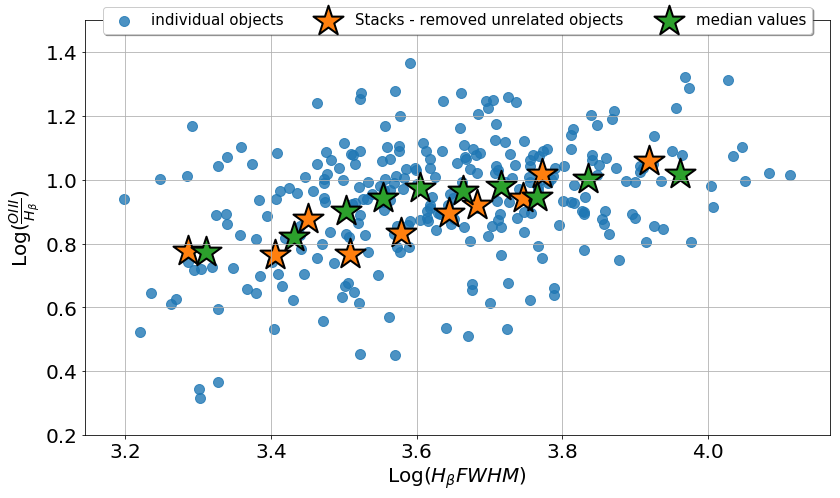

In [18]:
import matplotlib.pyplot as plt
import numpy
import pickle
plt.figure(figsize = (12,7))

ha = numpy.linspace(1700,9000, 1000)
nlr = ((1.03)*numpy.log10(ha)-2.87 )
nlr = ((0.75)*numpy.log10(ha)-1.87 )
hb = 1.07*(1000)* ( ( (ha)/1000 )**1.03 )
alpha_dots = 0.8
if True:
    #vHb_fwhm[25,0] = numpy.nan
    #[hb_v_fwhm, narrow_oiii_fwhm, narrow_oiii_ampl, narrow_h_beta_fwhm, narrow_h_beta_ampl, broad_h_beta_fwhm, _, broad_oiii_ampl] = numpy.load('line_measurements_dalya_data_mcmcv0_fit_code_tests_fe_removed.npy')
    l_oiii = nOIII_A[:,0]#*narrow_oiii_fwhm 
    l_hbeta = nHb_A[:,0]#*narrow_h_beta_fwhm
    #x_all = numpy.log10(hb_v_fwhm.copy())#[2:]
    f = 1
    x_all = numpy.log10(f*vHb_fwhm[:,0]*300000/4863).copy()#[2:]


    y_all = numpy.log10(l_oiii/l_hbeta).copy()#[2:]
    x_cut = 0#3.2
    plt.scatter(x_all[x_all > x_cut], y_all[x_all > x_cut], s= 100,alpha = alpha_dots, label=r'individual objects')





        
if False:  
    run_name_stacks = 'low_z_all_025'
    [SnHb_A, SvHb_fwhm, SbHb_fwhm ,SnOIII_A]  = numpy.load('../results/individual_objects/final_res_{}.npy'.format(run_name_stacks))

    #[hb_v_fwhm, narrow_oiii_fwhm, narrow_oiii_ampl, narrow_h_beta_fwhm, narrow_h_beta_ampl, broad_h_beta_fwhm, _, broad_oiii_ampl] = numpy.load('line_measurements_dalya_data_mcmcv0_fit_code_tests_fe_removed.npy')
    l_oiii = SnOIII_A[:,0]#*narrow_oiii_fwhm 
    l_hbeta = SnHb_A[:,0]#*narrow_h_beta_fwhm
    #x_all = numpy.log10(hb_v_fwhm.copy())#[2:]
    f = 1
    x_all = numpy.log10(f*SvHb_fwhm[:,0]*300000/4863).copy()#[2:]


    y_all = numpy.log10(l_oiii/l_hbeta).copy()#[2:]
    plt.scatter(x_all[x_all > x_cut], y_all[x_all > x_cut], marker = '*', s= 1000,alpha = 1, label=r'Stacks')

if True:
    run_name_object_to_fit_stacks = 'stacked_spectra_with_no_nhb_with_complex_with_maybe'
    [SnHb_A, SvHb_fwhm, SbHb_fwhm ,SnOIII_A]  = numpy.load('fit_results/final_res_{}.npy'.format(run_name_object_to_fit_stacks))

    #[hb_v_fwhm, narrow_oiii_fwhm, narrow_oiii_ampl, narrow_h_beta_fwhm, narrow_h_beta_ampl, broad_h_beta_fwhm, _, broad_oiii_ampl] = numpy.load('line_measurements_dalya_data_mcmcv0_fit_code_tests_fe_removed.npy')
    l_oiii = SnOIII_A[:,0]#*narrow_oiii_fwhm 
    l_hbeta = SnHb_A[:,0]#*narrow_h_beta_fwhm
    #x_all = numpy.log10(hb_v_fwhm.copy())#[2:]
    f = 1
    x_all = numpy.log10(f*SvHb_fwhm[:,0]*300000/4863).copy()#[2:]


    y_all = numpy.log10(l_oiii/l_hbeta).copy()#[2:]
    plt.scatter(x_all[x_all > x_cut], y_all[x_all > x_cut], edgecolors='k', lw=2,marker = '*', s= 1000,alpha = 1, label=r'Stacks - removed unrelated objects')

if False:
    run_name_object_to_fit_stacks = 'stacked_spectra_all'
    [SnHb_A, SvHb_fwhm, SbHb_fwhm ,SnOIII_A]  = numpy.load('fit_results/final_res_{}.npy'.format(run_name_object_to_fit_stacks))

    #[hb_v_fwhm, narrow_oiii_fwhm, narrow_oiii_ampl, narrow_h_beta_fwhm, narrow_h_beta_ampl, broad_h_beta_fwhm, _, broad_oiii_ampl] = numpy.load('line_measurements_dalya_data_mcmcv0_fit_code_tests_fe_removed.npy')
    l_oiii = SnOIII_A[:,0]#*narrow_oiii_fwhm 
    l_hbeta = SnHb_A[:,0]#*narrow_h_beta_fwhm
    #x_all = numpy.log10(hb_v_fwhm.copy())#[2:]
    f = 1
    x_all = numpy.log10(f*SvHb_fwhm[:,0]*300000/4863).copy()#[2:]


    y_all = numpy.log10(l_oiii/l_hbeta).copy()#[2:]
    plt.scatter(x_all[x_all > x_cut], y_all[x_all > x_cut], edgecolors='k', lw=2,marker = '*', s= 1000, alpha = 1, label=r'Stacks - all')

if True:

    #[hb_v_fwhm, narrow_oiii_fwhm, narrow_oiii_ampl, narrow_h_beta_fwhm, narrow_h_beta_ampl, broad_h_beta_fwhm, _, broad_oiii_ampl] = numpy.load('line_measurements_dalya_data_mcmcv0_fit_code_tests_fe_removed.npy')
    l_oiii = nOIII_A[:,0]#*narrow_oiii_fwhm 
    l_hbeta = nHb_A[:,0]#*narrow_h_beta_fwhm
    #x_all = numpy.log10(hb_v_fwhm.copy())#[2:]
    f = 1
    x_all = numpy.log10(f*vHb_fwhm[:,0]*300000/4863).copy()#[2:]


    y_all = numpy.log10(l_oiii/l_hbeta).copy()#[2:]
    x_all = x_all[y_all > -0.8]
    y_all = y_all[y_all > -0.8]
    
    nof_points = len(x_all)
    order = numpy.argsort(x_all)
    n_groups = 10
    l = int(nof_points / n_groups) * n_groups
    xgroups = numpy.split(x_all[order][:l], n_groups)
    ygroups = numpy.split(y_all[order][:l], n_groups)
    x_med = []
    y_med = []
    for xg,yg in zip(xgroups, ygroups):
        x_med += [numpy.nanmean(xg)]
        y_med += [numpy.nanmean(yg)]
    
    plt.scatter(x_med, y_med, edgecolors='k', lw=2,marker = '*', s= 1000, alpha = 1, label=r'median values')


        

#plt.legend(fontsize = 15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True, fontsize = 15)
plt.xlabel(r'Log($H_{\beta} FWHM$)', fontsize = 20)
plt.ylabel(r'Log($\frac{O III}{H_{\beta}}$)', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
#plt.xlim([3.1, 4.3])
plt.ylim([0.2,1.5])
plt.grid()
plt.tight_layout()
plt.show()

In [57]:
xgroups[0]

array([0.6114332 , 0.61474247, 0.6150611 , 0.62387585, 0.62459838,
       0.62617909, 0.63306541, 0.63800625, 0.64484374, 0.64497695,
       0.64705745, 0.65600563, 0.65846554, 0.66111114, 0.66753425,
       0.6681413 , 0.67384557, 0.67555579, 0.67641832, 0.69813207,
       0.70221197, 0.70345025, 0.70446483, 0.71772004, 0.71949202,
       0.72459605])

In [19]:
import pyperclip

import numpy
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
cmap = get_cmap('viridis')
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

from astropy.io import fits
from astropy.table import Table
hdul = fits.open('data/spiders_quasar_bhmass-DR14.fits')
data_tbl = Table(hdul[1].data)
spiders_df = data_tbl.to_pandas()
del(hdul)
del(data_tbl)
spiders_df.head()
spiders_BLAGN_df = spiders_df[ (spiders_df['CLASS_BEST'] == 'BLAGN ') | (spiders_df['CLASS_BEST'] == 'QSO   ')].copy()
del(spiders_df)
print(spiders_BLAGN_df.shape)
spiders_BLAGN_df.head()

(8302, 170)


,xray_detection,name,RA,DEC,ExpTime,ExiML_2RXS,DETML_XMMSL,f_2RXS,errf_2RXS,fden_2RXS,...,logBHMVP_hb,errlogBHMVP_hb,logBHMMD_hb,errlogBHMMD_hb,logBHMA_hb,errlogBHMA_hb,l_edd1,l_edd2,edd_ratio1,edd_ratio2
0,2RXS,2RXS J131703.4-021538,199.26434,-2.26066,273.859985,161.0,-99.0,8.035261e-12,7.752275e-13,2.811901e-30,...,6.778126,0.082026,6.288811,0.082846,6.717432,0.082175,NaN,7.799543e+44,NaN,0.006164
1,2RXS,2RXS J130358.4+534748,195.99369,53.79679,505.869995,273.0,-99.0,8.729714e-13,3.046346e-13,3.318945e-31,...,7.750659,0.060184,7.374837,0.060549,7.710600,0.060250,NaN,7.321536e+45,NaN,0.007065
2,2RXS,2RXS J160951.4+490216,242.46435,49.03793,535.039978,266.0,-99.0,1.409289e-12,3.086196e-13,5.069907e-31,...,6.893677,0.096619,6.542989,0.096997,6.858188,0.096688,NaN,1.017701e+45,NaN,0.086011
3,2RXS,2RXS J081517.7+460431,123.82380,46.07529,463.630005,61.0,-99.0,4.602566e-12,6.818868e-13,1.625549e-30,...,7.158066,0.110853,6.823838,0.111148,7.125570,0.110907,NaN,1.870724e+45,NaN,0.066039
4,2RXS,2RXS J160519.8+520726,241.33253,52.12398,547.679993,95.0,-99.0,8.669619e-13,2.706654e-13,3.243396e-31,...,7.229066,0.078857,6.829267,0.079705,7.184648,0.079011,NaN,2.202975e+45,NaN,0.014213


In [31]:
redshifts = spiders_BLAGN_df['redshift'].values
hb_fwhm = spiders_BLAGN_df['virialfwhm_hb'].values
l5100 = spiders_BLAGN_df['l_5100'].values
mbh = spiders_BLAGN_df['logBHMA_hb'].values
hb_fwhm_cut_1 = 1870*(l5100/(10**44))**0.175
hb_fwhm_cut_2 = 1700*(10**mbh/(10**7))**0.175
is_nls1 = hb_fwhm < hb_fwhm_cut_2

edd_ratio = spiders_BLAGN_df['l_bol2'].values.copy()/spiders_BLAGN_df['l_edd2'].values.copy()
lbol = spiders_BLAGN_df['l_bol2'].values.copy()


/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


array([  0,   1,   2,   3,   5,   6,   7,   8,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 157, 158, 159, 160, 161, 162, 163, 164, 165])

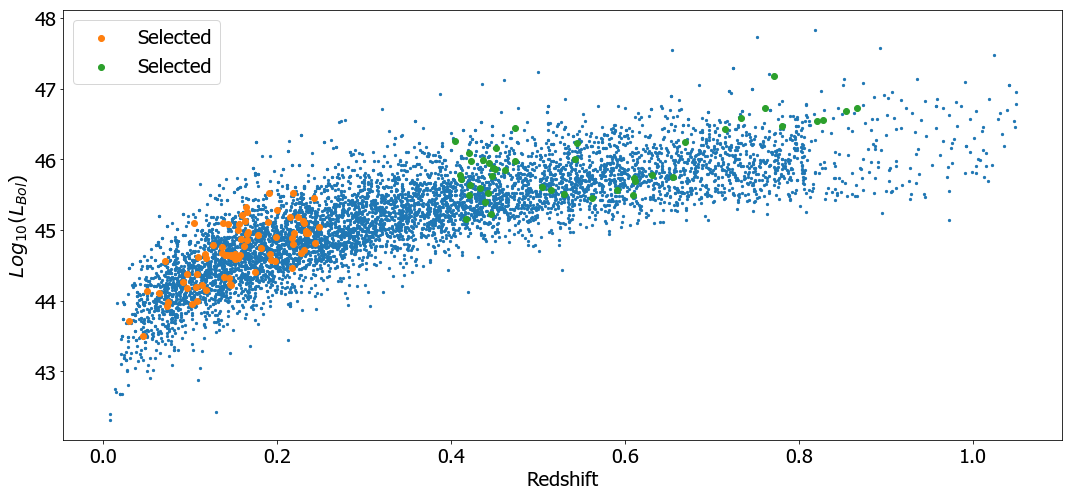

In [41]:
plt.figure(figsize = (15,7))
loglbol = numpy.log10(lbol)
plt.scatter(redshifts, loglbol, s =5)

inds_low_ = numpy.where( (redshifts[inds_to_plot] < 0.25) &(~is_nls1[inds_to_plot]) )[0]
inds_low = inds_to_plot[inds_low_]


plt.scatter(redshifts[inds_low], loglbol[inds_low], label=r'Selected')

inds_high_ = numpy.where( (redshifts[inds_to_plot] > 0.4) &(~is_nls1[inds_to_plot]) )[0]
inds_high = inds_to_plot[inds_high_]

plt.scatter(redshifts[inds_high], loglbol[inds_high], label=r'Selected')


plt.xlabel('Redshift', fontsize = 20)
plt.ylabel(r'$Log_{10}(L_{Bol}$)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

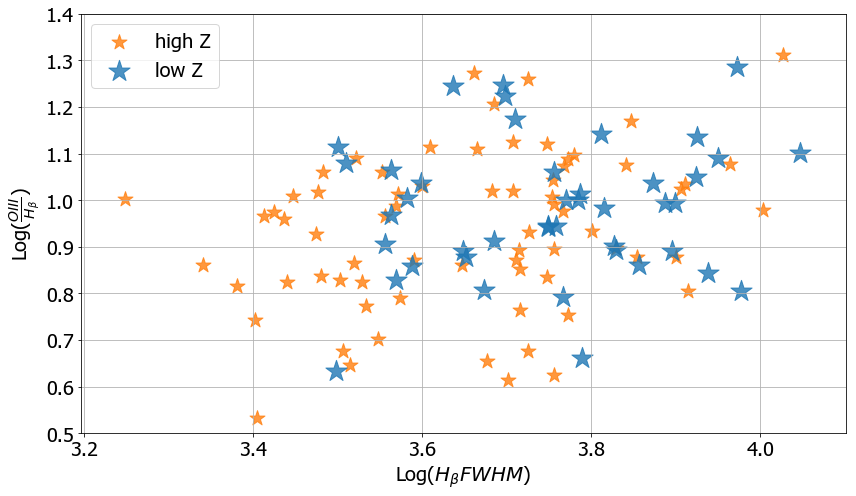

In [46]:
import matplotlib.pyplot as plt
import numpy
import pickle
plt.figure(figsize = (12,7))

ha = numpy.linspace(1700,9000, 1000)
nlr = ((1.03)*numpy.log10(ha)-2.87 )
nlr = ((0.75)*numpy.log10(ha)-1.87 )
hb = 1.07*(1000)* ( ( (ha)/1000 )**1.03 )
alpha_dots = 0.8
if True:
    #vHb_fwhm[25,0] = numpy.nan
    #[hb_v_fwhm, narrow_oiii_fwhm, narrow_oiii_ampl, narrow_h_beta_fwhm, narrow_h_beta_ampl, broad_h_beta_fwhm, _, broad_oiii_ampl] = numpy.load('line_measurements_dalya_data_mcmcv0_fit_code_tests_fe_removed.npy')
    l_oiii = nOIII_A[inds_low_,0]#*narrow_oiii_fwhm 
    l_hbeta = nHb_A[inds_low_,0]#*narrow_h_beta_fwhm
    #x_all = numpy.log10(hb_v_fwhm.copy())#[2:]
    f = 1
    x_all = numpy.log10(f*vHb_fwhm[inds_low_,0]*300000/4863).copy()#[2:]


    y_all = numpy.log10(l_oiii/l_hbeta).copy()#[2:]
    x_cut = 0#3.2
    plt.scatter(x_all[x_all > x_cut], y_all[x_all > x_cut], marker = '*', color='#ff7f0e', s= 250,alpha = alpha_dots, label=r'high Z')


        
        
    l_oiii = nOIII_A[inds_high_,0]#*narrow_oiii_fwhm 
    l_hbeta = nHb_A[inds_high_,0]#*narrow_h_beta_fwhm
    #x_all = numpy.log10(hb_v_fwhm.copy())#[2:]
    f = 1
    x_all = numpy.log10(f*vHb_fwhm[inds_high_,0]*300000/4863).copy()#[2:]


    y_all = numpy.log10(l_oiii/l_hbeta).copy()#[2:]
    x_cut = 0#3.2
    plt.scatter(x_all[x_all > x_cut], y_all[x_all > x_cut], marker = '*', color='#1f77b4', s= 500,alpha = alpha_dots, label=r'low Z')




        

plt.legend(fontsize = 20)
plt.xlabel(r'Log($H_{\beta} FWHM$)', fontsize = 20)
plt.ylabel(r'Log($\frac{O III}{H_{\beta}}$)', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
#plt.xlim([3.1, 4.3])
plt.ylim([0.5,1.4])
plt.grid()
plt.tight_layout()
plt.show()